In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import cumsum, log, polyfit, sqrt, std, subtract

In [2]:
fname = "Timeseries.txt"
data = pd.read_table(fname,delimiter="\t")
t = data.as_matrix(columns=[data.columns[0]])[:,0]
#epsDat = data.as_matrix(columns=[data.columns[14]])[:,0]
#epsDat = data.as_matrix(columns=[data.columns[26]])[:,0]
data

,i,Random,T_trend,Sseasonality,Total
0,0,24,3.2,-5.783190,21.41680
1,1,14,3.3,-5.154870,12.14510
2,2,25,3.4,-4.526550,23.87350
3,3,17,3.5,-3.898230,16.60180
4,4,12,3.6,-3.269910,12.33010
5,5,21,3.7,-2.641590,22.05840
6,6,21,3.8,-2.013270,22.78670
7,7,15,3.9,-1.384960,17.51500
8,8,17,4.0,-0.756637,20.24340
9,9,5,4.1,-0.128319,8.97168


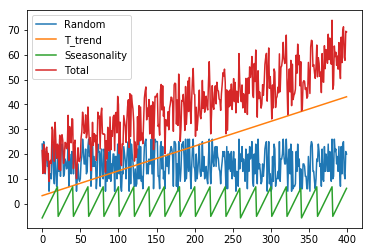

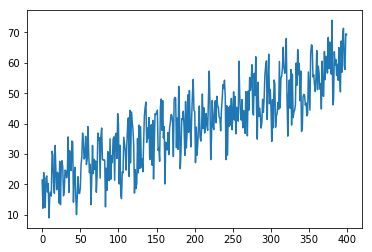

In [3]:
plt.plot(data['i'],data['Random'])
plt.plot(data['i'],data['T_trend'])
plt.plot(data['i'],data['Sseasonality'])
plt.plot(data['i'],data['Total'])
plt.legend()

plt.show()
plt.plot(data['i'],data['Sseasonality']+data['Random']+data['T_trend'])
plt.show()

In [4]:
def hurst(ts):
	"""Returns the Hurst Exponent of the time series vector ts"""
	# Create the range of lag values
	lags = range(2, 100)

	# Calculate the array of the variances of the lagged differences
	tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]

	# Use a linear fit to estimate the Hurst Exponent
	poly = polyfit(log(lags), log(tau), 1)

	# Return the Hurst exponent from the polyfit output
	return poly[0]*2.0


In [5]:
#gbm = log(cumsum(randn(100000))+1000)
#mr = log(randn(100000)+1000)
#tr = log(cumsum(randn(100000)+1)+1000)

# Output the Hurst Exponent for each of the above series
# and the price of Google (the Adjusted Close price) for 
# the ADF test given above in the article
print ("Hurst(data['Random']):   %s" % hurst(data['Random']))
print ("Hurst(data['T_trend']):    %s" % hurst(data['T_trend']))
print ("Hurst(data['Sseasonality']):    %s" % hurst(data['Sseasonality']))
print ("Hurst(data['Total']):    %s" % hurst(data['Total']))


Hurst(data['Random']):   0.000809384987771
Hurst(data['T_trend']):    0.680556936961
Hurst(data['Sseasonality']):    -0.021130423947
Hurst(data['Total']):    0.000655788660593
